In [133]:
import pandas as pd 
import seaborn as sns
import numpy as np

In [134]:
#READ the csv file and name it as diabetes_df
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [135]:
#Check the datatype of the columns
print(diabetes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   preg    768 non-null    int64 
 1   plas    768 non-null    object
 2   pres    768 non-null    object
 3   skin    768 non-null    object
 4   test    768 non-null    object
 5   mass    768 non-null    object
 6   pedi    768 non-null    object
 7   age     768 non-null    int64 
 8   class   768 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 54.1+ KB
None


In [136]:
#Replacing na values with 0 and tba values with 0
diabetes_df.replace({'na': '0', 'tba': '0'}, inplace=True)
#Replacing all the whitespace in between numbers that is causing an error
diabetes_df['pres'] = diabetes_df['pres'].str.replace(' ', '', regex=False)

In [137]:
#Converting columns with continuous data to float64
diabetes_df["mass"] = diabetes_df["mass"].astype('float64')
diabetes_df["pedi"] = diabetes_df["pedi"].astype('float64')

In [138]:
#Converting columns with discrete data to int64
diabetes_df['plas'] = diabetes_df['plas'].astype('int64')
diabetes_df['pres'] = diabetes_df['pres'].astype('int64')
diabetes_df['skin'] = diabetes_df['skin'].astype('int64')
diabetes_df['test'] = diabetes_df['test'].astype('int64')

In [139]:
#Check the datatype of the columns again
print(diabetes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [140]:
#Grab the mean of all the columns in order to replace the 0 or NA Values
preg_mean = round(diabetes_df["preg"].mean(),0)
plas_mean = diabetes_df["plas"].mean()
pres_mean = round(diabetes_df["pres"].mean(),0)
skin_mean = round(diabetes_df["skin"].mean(),0)
test_mean = round(diabetes_df["test"].mean(),0)
age_mean = round(diabetes_df["age"].mean(),0)
class_mean = round(diabetes_df["class"].mean(),0) 

#Grab the mean of mass which is 1 decimal place
mass_mean = round(diabetes_df["mass"].mean(),1)
#Grab the mean of pedi which is 3 decimal places
pedi_mean = round(diabetes_df["pedi"].mean(),3)

In [148]:
#Replacing the 0 values with the column mean
diabetes_df["preg"].replace(0, preg_mean, inplace=True)
diabetes_df["plas"].replace(0, plas_mean, inplace=True)
diabetes_df["pres"].replace(0, pres_mean, inplace=True)
diabetes_df["skin"].replace(0, skin_mean, inplace=True)
diabetes_df["test"].replace(0, test_mean, inplace=True)
diabetes_df["age"].replace(0, age_mean, inplace=True)
diabetes_df["class"].replace(0, class_mean, inplace=True)

diabetes_df.head(10)

C:\Users\UPEPO\AppData\Local\Temp\ipykernel_16140\1995162962.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_df["preg"].replace(0, preg_mean, inplace=True)
C:\Users\UPEPO\AppData\Local\Temp\ipykernel_16140\1995162962.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148.0,72,35,80,33.6,0.627,50,1
1,1,85.0,66,29,80,26.6,0.351,31,0
2,8,183.0,64,21,80,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,4,137.0,40,35,168,43.1,2.288,33,1
5,5,116.0,74,21,80,25.6,0.201,30,0
6,3,78.0,50,32,88,31.0,0.248,26,1
7,10,115.0,69,21,80,35.3,0.134,29,0
8,2,197.0,70,45,543,30.5,0.158,53,1
9,8,125.0,96,21,80,0.0,0.232,54,1


In [149]:
#Replacing pedi and mass 0 values into their respective column mean
diabetes_df['pedi'].replace(0.0, pedi_mean, inplace=True)
diabetes_df['mass'].replace(0.0, mass_mean, inplace=True)

C:\Users\UPEPO\AppData\Local\Temp\ipykernel_16140\3394448339.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_df['pedi'].replace(0.0, pedi_mean, inplace=True)
C:\Users\UPEPO\AppData\Local\Temp\ipykernel_16140\3394448339.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [150]:
diabetes_df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.423177,121.672353,72.253906,26.768229,118.753906,32.466276,0.472318,33.240885,0.348958
std,2.980481,30.397298,12.115669,9.519125,93.041148,6.864558,0.331208,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,21.000000,80.000000,27.575000,0.243750,24.000000,0.000000
50%,4.000000,117.500000,72.000000,23.000000,80.000000,32.000000,0.375500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='preg'>

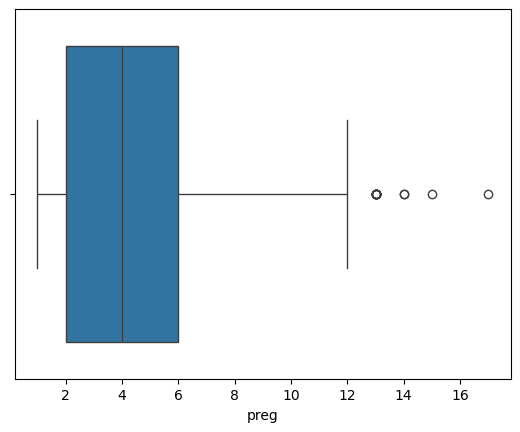

In [151]:
#Using boxplot to find the outliers
sns.boxplot(x='preg',data=diabetes_df)


<Axes: xlabel='plas'>

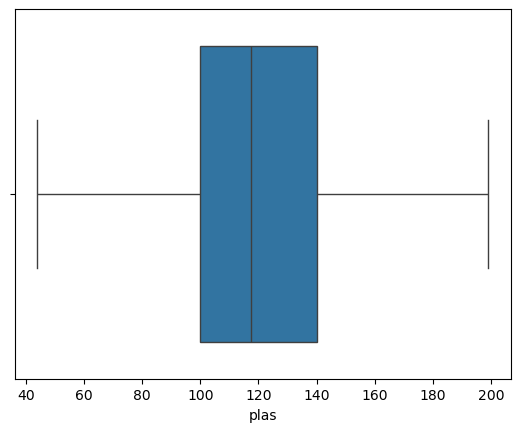

In [152]:
#
sns.boxplot(x='plas',data=diabetes_df)


<Axes: xlabel='pres'>

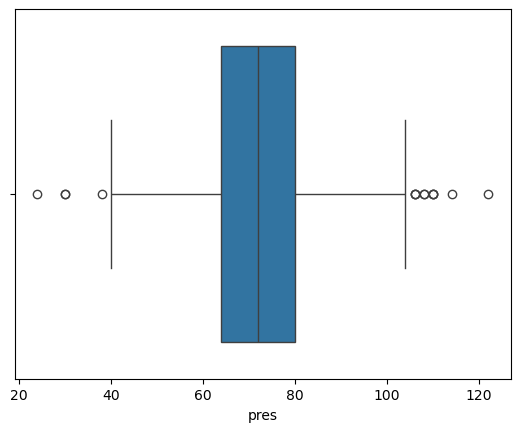

In [153]:
#
sns.boxplot(x='pres',data=diabetes_df)

<Axes: xlabel='skin'>

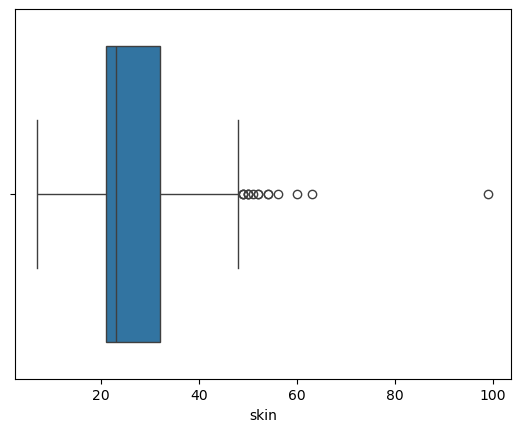

In [154]:
#
sns.boxplot(x='skin',data=diabetes_df)

<Axes: xlabel='test'>

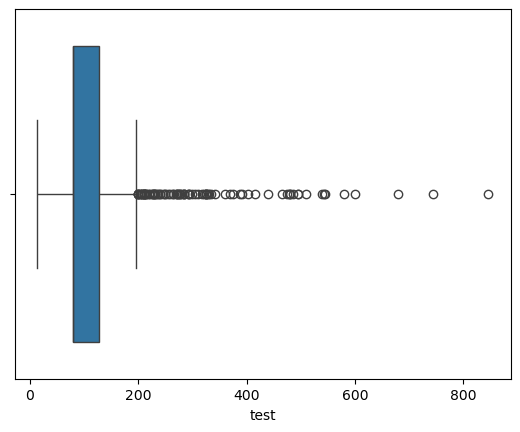

In [155]:
#
sns.boxplot(x='test',data=diabetes_df)


<Axes: xlabel='mass'>

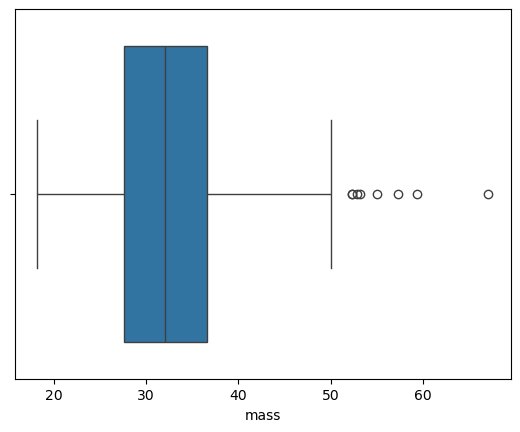

In [156]:
sns.boxplot(x='mass',data=diabetes_df)


<Axes: xlabel='pedi'>

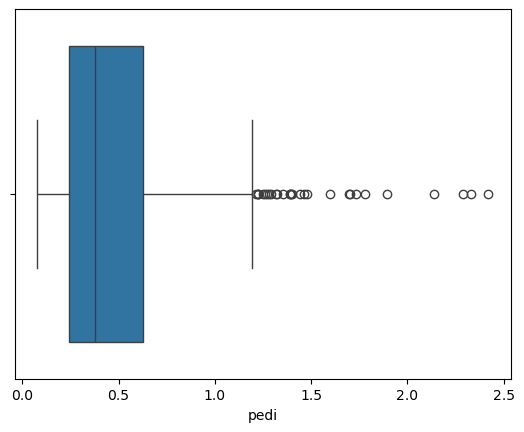

In [157]:
sns.boxplot(x='pedi',data=diabetes_df)

<Axes: xlabel='age'>

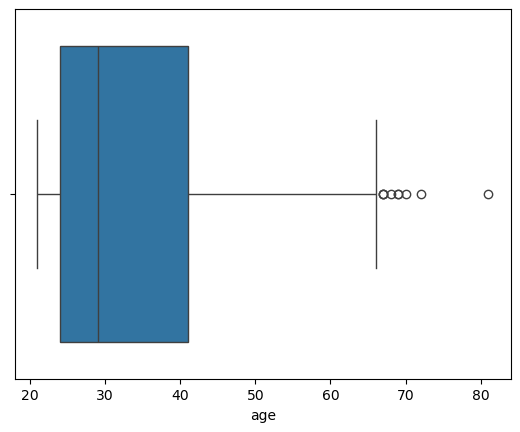

In [158]:
sns.boxplot(x='age',data=diabetes_df)


<Axes: xlabel='class'>

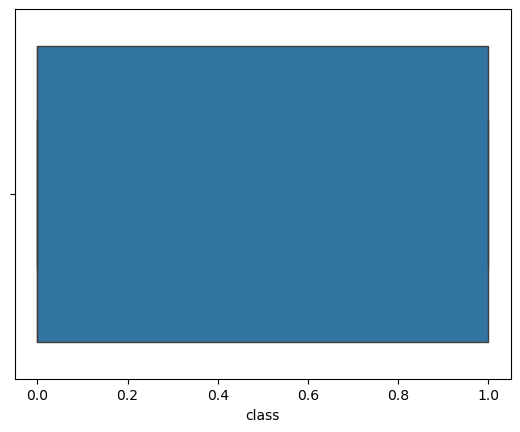

In [159]:
sns.boxplot(x='class',data=diabetes_df)